In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
from sklearn import datasets, linear_model

"""
The writer:
Mehmet F BAGCI
"""

# The plot of sex, age and voting rate 

In [13]:
def merge_Ind_Col(dataframe):
    '''
    Our data frame we read has many index columns and many headers and ti readh a data, a tuple required to reach it and this function merges and decrease the headder and index to one
    :param:dataframe: pandas.dataframe
    :return: rtn:  pandas.dataframe
    '''
    Update_col_names=[]
    for col in dataframe.columns:
        Update_col_names.append(' '.join(col))
    Update_index_names=[]
    for ind in dataframe.index:
        Update_index_names.append(' '.join(ind))
    b=dataframe.values[:,:]
    rtn=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
    return rtn

In [14]:
# Read data from table and name is then convert multi index and columns to single 
census_data_table_1=pd.read_excel("../US_census//table01.xlsx",skiprows=4,skipfooter= 7, header=[0,1,2],index_col=[0,1]).fillna(method='ffill')
census_data_table_1.name='by Sex and Single Years of Age'
census_data_table_1=merge_Ind_Col(census_data_table_1)
census_data_table_1.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total population Unnamed: 2_level_1 Unnamed: 2_level_2,United States citizen Total citizen population Unnamed: 3_level_2,United States citizen Reported registered Number,United States citizen Reported registered Percent,United States citizen Reported not registered Number,United States citizen Reported not registered Percent,United States citizen No response to registration1 Number,United States citizen No response to registration1 Percent,United States citizen Reported voted Number,United States citizen Reported voted Percent,United States citizen Reported not voted Number,United States citizen Reported not voted Percent,United States citizen No response to voting2 Number,United States citizen No response to voting2 Percent,Total population Reported registered Percent,Total population Reported voted Percent
BOTH SEXES Total 18 years and over,252274.0,231593.0,168308.0,72.7,25782.0,11.1,37503.0,16.2,154628.0,66.8,40561.0,17.5,36404.0,15.7,66.7,61.3
BOTH SEXES 18 to 24 years,28659.0,26737.0,15984.0,59.8,5421.0,20.3,5332.0,19.9,13752.0,51.4,7838.0,29.3,5147.0,19.3,55.8,48.0
BOTH SEXES 25 to 34 years,44871.0,39962.0,27351.0,68.4,5697.0,14.3,6914.0,17.3,24091.0,60.3,9191.0,23.0,6680.0,16.7,61.0,53.7
BOTH SEXES 35 to 44 years,41558.0,35977.0,25852.0,71.9,4277.0,11.9,5849.0,16.3,23421.0,65.1,6911.0,19.2,5646.0,15.7,62.2,56.4
BOTH SEXES 45 to 54 years,39758.0,35914.0,26717.0,74.4,3412.0,9.5,5784.0,16.1,24791.0,69.0,5476.0,15.2,5647.0,15.7,67.2,62.4


(0.9345742686755638, 4.5401980886373496e-29)
[[1.23334339]]


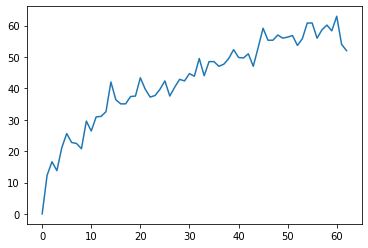

In [15]:
# Calcualte population and percent values for bothgender 
bs_voting=census_data_table_1['United States citizen Reported voted Percent'][8:71].values
bs_moment=census_data_table_1['United States citizen Reported voted Number'][8:71].values

# In here the the correlation value calculated.
print(pearsonr(census_data_table_1['United States citizen Reported voted Percent'][8:71],np.arange(18,81)))
# Normalize the data for regression and plot 
regr = linear_model.LinearRegression()
bs_voting=bs_voting-min(bs_voting)
bs_voting=bs_voting/max(bs_voting)
bs_voting=bs_voting*63
# fit model 
regr.fit(np.array(bs_voting).reshape(-1, 1), np.array(range(63)).reshape(-1, 1))
print(regr.coef_)
plt.plot(bs_voting)


In [16]:
# Calcualte population and percent values for male 

m_voting=census_data_table_1['United States citizen Reported voted Percent'][80:143].values
m_moment=census_data_table_1['United States citizen Reported voted Number'][80:143].values
plt.rcParams.update({'font.size': 32})


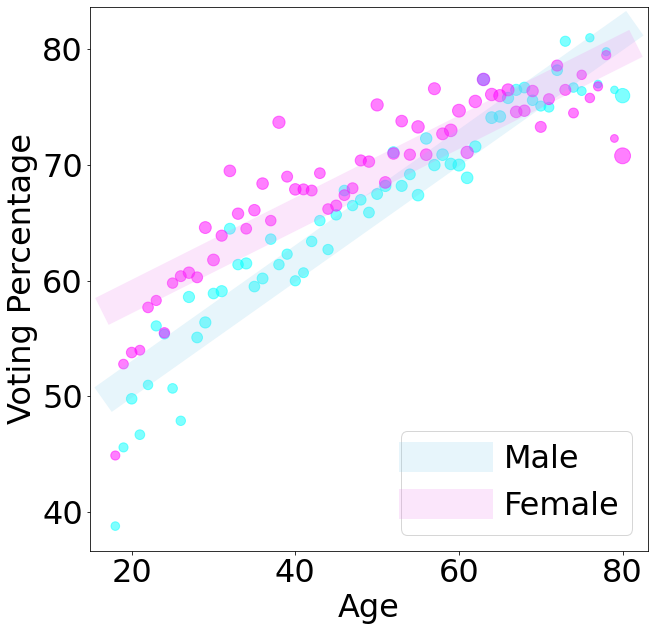

In [17]:
# Calcualte population and percent values for female

f_voting=census_data_table_1['United States citizen Reported voted Percent'][152:215].values
f_moment=census_data_table_1['United States citizen Reported voted Number'][152:215].values

plt.figure(figsize=[10,10])
# Calcualte the linear regresion 
regr_f = linear_model.LinearRegression()
regr_m = linear_model.LinearRegression()
regr_f.fit(np.array(range(63)).reshape(-1, 1),f_voting.reshape(-1, 1))
regr_m.fit(np.arange(63).reshape(-1, 1),m_voting.reshape(-1, 1))
pred_f=regr_f.predict(np.arange(63).reshape(-1, 1))
pred_m=regr_m.predict(np.arange(63).reshape(-1, 1))
plt.plot(np.arange(18,81),pred_m, linewidth=30,alpha=0.2,c='skyblue')
plt.plot(np.arange(18,81),pred_f, linewidth=30,alpha=0.2,c='violet')
plt.rcParams.update({'font.size': 32})
# Plot the scatter acording to its amount 
plt.scatter(np.arange(18,81),m_voting,cmap='cool',s=m_moment/10,c='cyan',alpha=0.5)
plt.scatter(np.arange(18,81),f_voting,cmap='cool',s=f_moment/10,c='magenta',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Voting Percentage")
plt.legend(['Male',"Female"])
